In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import scipy as sp
import sklearn

from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
filename = 'events.csv'
events = pd.read_csv('events.csv')
shots = events[(events.event_type==1)]

In [5]:
shots_prediction = shots.iloc[:,-6:]
dummies = pd.get_dummies(shots_prediction, columns=['location', 'bodypart','assist_method', 'situation'])
dummies.columns = ['is_goal', 'fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right', 'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range', 'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header', 'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
dummies

,is_goal,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,...,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
940991,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
940992,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
940993,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [6]:
dummies.sum()

is_goal                 24441
fast_break               4588
loc_centre_box          69606
loc_diff_angle_lr        1517
diff_angle_left          2563
diff_angle_right         2458
left_side_box           19033
left_side_6ybox          3492
right_side_box          18441
right_side_6ybox         3426
close_range              6661
penalty                  2596
outside_box             93667
long_range               1991
more_35y                 1978
more_40y                  256
not_recorded             1450
right_foot             121901
left_foot               71278
header                  35956
no_assist               61276
assist_pass            109503
assist_cross            43271
assist_header            7713
assist_through_ball      7372
open_play              193747
set_piece               11741
corner                  18225
free_kick                5422
dtype: int64

In [7]:
X = dummies.iloc[:,1:]
y = dummies.iloc[:,0]
print(X.shape)
print(y.shape)

(229135, 28)
(229135,)


In [8]:
print(y)

0         0
11        0
13        1
14        0
17        0
         ..
940983    0
940991    0
940992    0
940993    0
941006    0
Name: is_goal, Length: 229135, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [10]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_total = y_train.count()
y_positive = y_train.sum()

logistic_regression.score(X_train, y_train)


accuracy_logreg = logistic_regression.score(X_test, y_test) #mean accuracy
y_pred_logreg = logistic_regression.predict_proba(X_test)
predict_logreg = logistic_regression.predict(X_test)

y_total_logreg = y_train.count() #total shots
y_positive_logreg = y_train.sum() #total goals

auc_roc_logreg = roc_auc_score(y_test, y_pred_logreg[:, 1])

print('The training set contains {} examples (shots) of which {} are positives (goals).'.format(y_total_logreg, y_positive_logreg))
print('The accuracy of classifying whether a shot is goal or not is {:.2f} %'.format(accuracy_logreg*100))
print('Our classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc_logreg))

auc_pr_baseline = y_positive / y_total
print('The baseline performance for AUC-PR is {:.4f}. This is the AUC-PR that what we would get by random guessing.'.format(auc_pr_baseline))


The training set contains 148937 examples (shots) of which 15937 are positives (goals).
The accuracy of classifying whether a shot is goal or not is 91.10 %
Our classifier obtains an AUC-ROC of 0.8176.
The baseline performance for AUC-PR is 0.1070. This is the AUC-PR that what we would get by random guessing.


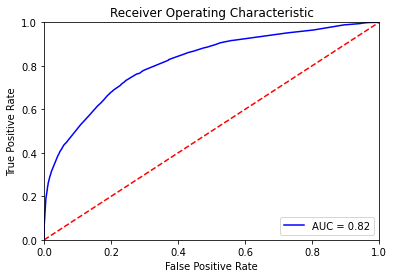

In [12]:
import sklearn.metrics as metrics

y_pred_logreg = logistic_regression.predict_proba(X_test)

preds = y_pred_logreg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
y_test

851561    0
744702    1
661032    0
195074    0
742812    0
         ..
175188    1
625826    0
35231     0
730013    0
802045    0
Name: is_goal, Length: 80198, dtype: int64

In [14]:
print('Confusion Matrix:')

print(confusion_matrix(y_test,predict_logreg))
print('Report:')
print(classification_report(y_test,predict_logreg))

Confusion Matrix:
[[70820   874]
 [ 6265  2239]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [15]:
logistic_regression.score(X_test,y_test)

0.9109828175266216

In [16]:
coefficients = pd.Series(logistic_regression.coef_[0], X_train.columns)
print(coefficients)

fast_break             1.716896
loc_centre_box         0.263435
loc_diff_angle_lr     -1.658073
diff_angle_left       -0.759564
diff_angle_right      -0.916071
left_side_box         -1.086377
left_side_6ybox        0.603199
right_side_box        -1.002462
right_side_6ybox       0.594143
close_range            2.039006
penalty                2.279791
outside_box           -1.781290
long_range            -2.189152
more_35y              -2.464638
more_40y              -1.985558
not_recorded           7.116415
right_foot            -0.085114
left_foot             -0.146372
header                -0.715712
no_assist             -0.276978
assist_pass           -0.247573
assist_cross          -0.621147
assist_header         -0.503727
assist_through_ball    0.702227
open_play             -0.116708
set_piece              0.639356
corner                 0.354591
free_kick             -1.824437
dtype: float64


In [17]:
#oversampling the minority class (here class 1=goal)

from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_goal = X[X.is_goal==0]
goal = X[X.is_goal==1]

# upsample minority
goal_upsampled = resample(goal,
                          replace=True, # sample with replacement
                          n_samples=len(no_goal), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_goal, goal_upsampled])

# check new class counts
upsampled.is_goal.value_counts()
# same number of goal and no_goal

1    133000
0    133000
Name: is_goal, dtype: int64

In [18]:
upsampled

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,...,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick,is_goal
536019,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
241887,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
848312,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
44032,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
384566,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802206,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
256667,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
284311,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
226666,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [19]:

X_train_new = upsampled.drop(['is_goal'], axis=1)
y_train_new = upsampled.is_goal
print(X_train_new.shape)
print(y_train_new.shape)

(266000, 28)
(266000,)


In [20]:
upsampledlogreg = LogisticRegression(solver='liblinear').fit(X_train_new, y_train_new)

upsampledlogreg_pred = upsampledlogreg.predict(X_test)

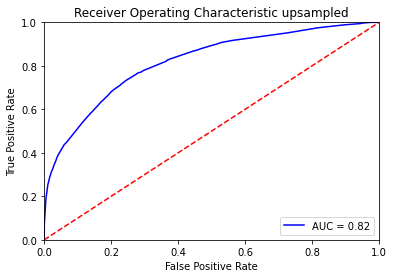

In [21]:
y_pred_upsampledlogreg = upsampledlogreg.predict_proba(X_test)

predsupsampled = y_pred_upsampledlogreg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predsupsampled)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic upsampled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
#nouveau résultat avec oversampling de la class 1(=goal)
print('Confusion Matrix:')
print(confusion_matrix(y_test,upsampledlogreg_pred))
print('Report:')
print(classification_report(y_test,upsampledlogreg_pred)) 

Confusion Matrix:
[[52007 19687]
 [ 2032  6472]]
Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     71694
           1       0.25      0.76      0.37      8504

    accuracy                           0.73     80198
   macro avg       0.60      0.74      0.60     80198
weighted avg       0.89      0.73      0.78     80198



In [23]:
upsampledlogreg.score(X_test,y_test)

0.7291827726377217

In [24]:
#undersampling the majority class (here class 0=no_goal)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_goal = X[X.is_goal==0]
goal = X[X.is_goal==1]

# downsample majority
no_goal_downsampled = resample(no_goal,
                                replace = False, # sample without replacement
                                n_samples = len(goal), # match minority n
                                random_state = 1) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_goal_downsampled, goal])

# checking counts
downsampled.is_goal.value_counts()

1    15937
0    15937
Name: is_goal, dtype: int64

In [25]:
downsampled

,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,close_range,...,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick,is_goal
111979,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
544062,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
70246,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
572258,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
426028,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532413,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
158922,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
612364,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
741932,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [26]:
X_train_new2 = upsampled.drop(['is_goal'], axis=1)
y_train_new2 = upsampled.is_goal
print(X_train_new2.shape)
print(y_train_new2.shape)

(266000, 28)
(266000,)


In [27]:
downsampledlogreg = logistic_regression.fit(X_train_new2, y_train_new2)

downsampledlogreg_pred = logistic_regression.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


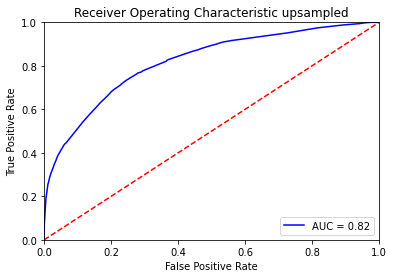

In [28]:
y_pred_downsampledlogreg = downsampledlogreg.predict_proba(X_test)

predsdownsampled = y_pred_downsampledlogreg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predsdownsampled)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic upsampled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#nouveau résultat avec undersampling de la class 0(=no_goal)
print('Confusion Matrix:')
print(confusion_matrix(y_test,downsampledlogreg_pred))
print('Report:')
print(classification_report(y_test,downsampledlogreg_pred)) 

#on obtient de moins bons résultats qu'avec l'oversampling

Confusion Matrix:
[[52007 19687]
 [ 2032  6472]]
Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     71694
           1       0.25      0.76      0.37      8504

    accuracy                           0.73     80198
   macro avg       0.60      0.74      0.60     80198
weighted avg       0.89      0.73      0.78     80198



In [30]:
downsampledlogreg.score(X_test,y_test)

0.7291827726377217

In [31]:
#oversampling the minority class (here class 1=goal) #70%-30%

from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_goal = X[X.is_goal==0]
goal = X[X.is_goal==1]

# upsample minority
goal_upsampled = resample(goal,
                          replace=True, # sample with replacement
                          n_samples=39900 , # len(no_goal) * 0,3 càd 30%
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_goal, goal_upsampled])

# check new class counts
upsampled.is_goal.value_counts()


0    133000
1     39900
Name: is_goal, dtype: int64

In [32]:
X_train_new3 = upsampled.drop(['is_goal'], axis=1)
y_train_new3 = upsampled.is_goal
print(X_train_new3.shape)
print(y_train_new3.shape)

(172900, 28)
(172900,)


In [33]:
upsampledlogreg = LogisticRegression(solver='liblinear').fit(X_train_new3, y_train_new3)

upsampledlogreg_pred = upsampledlogreg.predict(X_test)

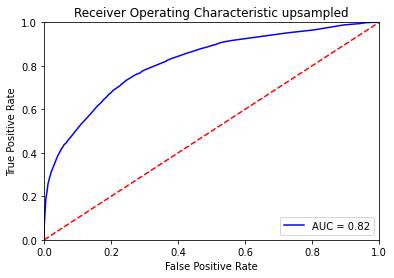

In [34]:
y_pred_upsampledlogreg = upsampledlogreg.predict_proba(X_test)

predsupsampled = y_pred_upsampledlogreg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predsupsampled)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic upsampled')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [35]:
#nouveau résultat avec oversampling de la class 1(=goal)
print('Confusion Matrix:')
print(confusion_matrix(y_test,upsampledlogreg_pred))
print('Report:')
print(classification_report(y_test,upsampledlogreg_pred)) 

#meilleure accuracy 0,90


Confusion Matrix:
[[68893  2801]
 [ 5265  3239]]
Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     71694
           1       0.54      0.38      0.45      8504

    accuracy                           0.90     80198
   macro avg       0.73      0.67      0.70     80198
weighted avg       0.89      0.90      0.89     80198



In [36]:
upsampledlogreg.score(X_test,y_test)

0.8994239257836854

In [38]:
#essayons la classifieur Random Forrest pour aider à corriger le problème "Imbalanced Dataset"
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

In [39]:
#The out-of-bag error is calculated on all the observations, but for calculating each row’s error the model only considers trees that have not seen this row during training.
#This is similar to evaluating the model on a validation set.

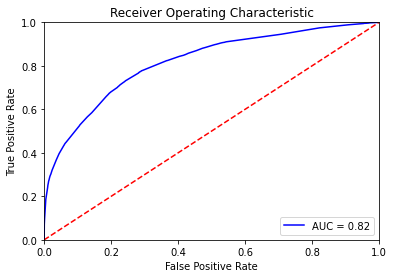

In [40]:
y_pred_rfc = rfc.predict_proba(X_test)

predsrfc = y_pred_rfc[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predsrfc)
roc_auc = metrics.auc(fpr, tpr)

# plt
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,rfc_pred))
print('Report:')
print(classification_report(y_test,rfc_pred))

Confusion Matrix:
[[70763   931]
 [ 6215  2289]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [42]:
rfc.score(X_test,y_test)

0.9108955335544527

In [43]:
#on essaye le classifieur Adaboost
from sklearn.ensemble import AdaBoostClassifier

# train model
adb = AdaBoostClassifier(n_estimators=400).fit(X_train, y_train)

# predict on test set
adb_pred = adb.predict(X_test)

In [44]:
print('Confusion Matrix:')
print(confusion_matrix(y_test,adb_pred))
print('Report:')
print(classification_report(y_test,adb_pred))

Confusion Matrix:
[[70808   886]
 [ 6276  2228]]
Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.38      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.62      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [45]:
adb.score(X_test,y_test)

0.9106960273323524